In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/disney-movies-and-tv-shows/disney_plus_titles.csv


#  ![](https://tse4.mm.bing.net/th?id=OIP.wFNnM0Ao2zQfVgrW3EbpZQHaEC&pid=Api&P=0&w=286&h=155)**United state Disney+**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('../input/disney-movies-and-tv-shows/disney_plus_titles.csv')

In [4]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...
...,...,...,...,...,...,...,...,...,...,...,...,...
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...


In [5]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Replace correct country name

In [6]:
data['country'].replace({'United States, Canada':'Canada','United States, United Kingdom':'United Kingdom','Canada, United States':'Canada','United Kingdom, United States, Canada':'Canada','United States, Germany, Ireland, United Kingdom':'Germany,ireland','United States, United Kingdom, South Africa':'South Africa','New Zealand, United States':'New Zealand','United Kingdom, United States':'United Kingdom','United States, Australia':'Australia','United States, Japan':'Japan','France, United Kingdom, United States':'France','United Kingdom, United States, Ireland':'Ireland','Ireland, United Kingdom, United States, South Korea, Canada':'South Korea','United States, France':'France','United States, Ireland':'Ireland','United States, United Kingdom, Hungary':'Hungary','United States, South Korea, France':'France','United States, Australia, France, Canada':'Canada'},inplace=True)


In [7]:
data['country'].replace({'United States, United Kingdom, Australia':'Australia','Australia, United States':'Austalia','United States, United Kingdom, Canada':'Canada','United States, South Korea':'South Korea','United States, United Kingdom, Australia':'Australia','United States, United Kingdom, Canada':'Canada','United States, South Korea':'South Korea','United Kingdom, Germany, United States':'Germany','United States, Mexico':'Mexico','United States, Germany, United Kingdom':'Germany','United States, New Zealand':'New Zealand','France, United States':'France','United Kingdom, China, United States':'China','United Kingdom, Canada, United States':'Canada','United Kingdom, Germany':'Germany','United States, United Kingdom, South Korea':'South Korea'},inplace=True)

In [8]:
data['country'].replace({'United States, Philippines, South Korea':'South Korea','United States, Panama, Mexico':'Mexico','Germany, United States':'Germany','United States, United Kingdom, Australia, Canada':'Australia','United States, Angola, Botswana, Namibia, South Africa':'South Africa','Canada, United States, United Kingdom, France, Luxembourg':'France','Tanzania, United States':'Tanzania','United States, Guatemala':'Guatemala','United States, Denmark':'Denmark','United States, Hong Kong, South Korea, France, Canada, China, United Kingdom, Australia, Japan, Taiwan, Philippines':'Japan','United States, South Korea, Singapore, Russia, Malaysia, Kazakhstan, Taiwan, Hong Kong, Japan, China, India, Syria, Iran, Egypt, Pakistan':'Pakistan','United States, Canada, Australia':'Canada','United States, South Korea, China, Taiwan':'Taiwan','United States, Taiwan, China':'China','Ireland, United States':'Ireland','France, Japan':'Japan','Norway, Sweden, United States':'Sweden','China, Hong Kong, United States':'China','Germany,ireland':'Germany','United States, Canada, Australia, Taiwan':'Canada','United States, Poland, Slovenia, Czech Republic, United Kingdom':'Poland','France, Canada, United States':'France','United States, Hungary, United Kingdom':'Hungary','United States, Taiwan, South Korea, China, Japan, United Kingdom':'Japan','United States, India, United Kingdom':'India','Canada, Malaysia, United States':'Canada','France, Switzerland, Spain, United States, United Arab Emirates':'United Arab','United Kingdom, United States, France':'France'
,'United Kingdom, Australia':'Australia','South Korea, United States, China, Japan':'Japan','Argentina, Mexico':'Mexico','United States, Canada, Hong Kong':'Hong Kong','United States, United Kingdom, Belgium, Canada':'Canada','United Kingdom, United States, Canada, Ireland':'Ireland',
                        'Austria, South Africa':'Africa',                                                     
'United States, Brazil':'Brazil',                                                      
'United States, Canada, Ireland':'Ireland',                                            
'Australia, United Kingdom':'Australia',                                                
'United States, Canada, United Kingdom, Singapore, Australia, Thailand':'Thailand',     
'United States, India':'India',                                                      
'France, United Kingdom':'France',                                                   
'United States, Germany':'Germany',                                                   
'United States, Spain, France, Canada, United Kingdom':'Canada',                     
'France, South Korea, Japan, United States':'Japan',
                        'Austria, United Kingdom, United States':'Austria' },inplace=True)

# United State Perticipate Disney+

In [9]:
country=data['country'].value_counts().reset_index()

In [10]:
country.columns=['country','counts']

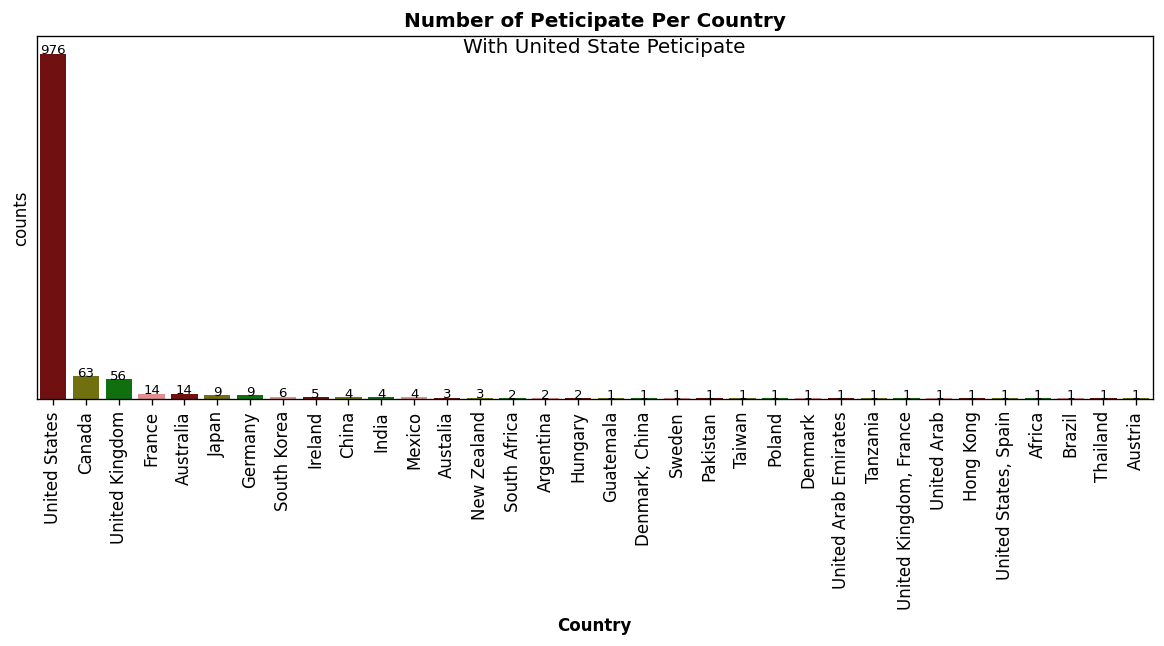

In [11]:
color=['Maroon','Olive','Green','#F08080']
fig = plt.figure(figsize=(12,4),dpi=120)
m=sns.barplot(x=country['country'],y=country['counts'],linewidth=50,ci=None,data=data,palette=color)
plt.tick_params(axis='x',labelsize=10,labelrotation=90)
plt.tick_params(axis = 'y',left = False,labelleft=False)
plt.xlabel('Country',weight='semibold')
plt.title('Number of Peticipate Per Country',weight='bold',fontname='Arial Black')
plt.text(12.5,980,'With United State Peticipate',fontsize=12,fontname='Times New Roman')
for index,row in country.iterrows():
    m.text(row.name,row.counts,round(row.counts),ha='center',fontsize=8)
    


see that rank of united state **1 place** participate disney+

# Yealy release Rank United States

In [12]:
rank = data.groupby(['country', 'release_year']).agg('count').reset_index()

In [13]:
rank['rank'] =rank['rating'].rank(method='dense',ascending=False).astype(int)

In [14]:
rank=rank[(rank['country']=='United States')]
rankchart = rank[['release_year','rating','rank']]
x=rankchart['release_year']
y=rankchart['rating']
x1=rankchart['release_year']
y1=rankchart['rank']

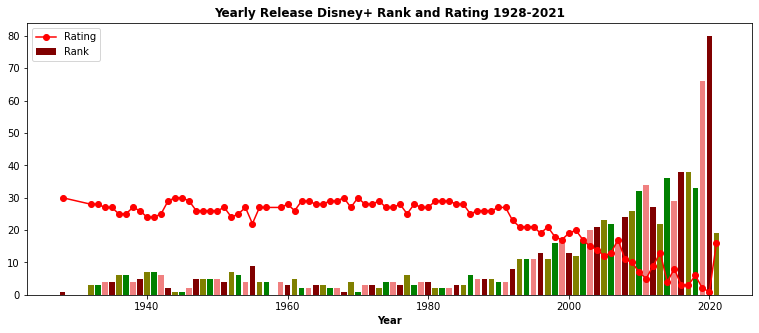

In [15]:
ax,legend = (['l1','l2'])
fig,ax = plt.subplots(figsize=(13,5))
ax.bar(x,y,color=color)
ax.plot(x1,y1,marker = 'o',color='red')
ax.set_xlabel('Year',weight='semibold')
ax.set_title('Yearly Release Disney+ Rank and Rating 1928-2021',weight='bold',fontname='Arial Black')
ax.legend(['Rating','Rank'])

# How to Paticipate USA compare with Other Countrys

In [16]:
us = data[(data['country']=='United States')]
us =us['type'].value_counts().reset_index()
ca = data[(data['country']=='Canada')]
ca = ca['type'].value_counts().reset_index()
fa = data[(data['country']=='France')]
fa=fa['type'].value_counts().reset_index()

Text(0.1, 1.5, 'How To Participate United States Compare With Canada and France')

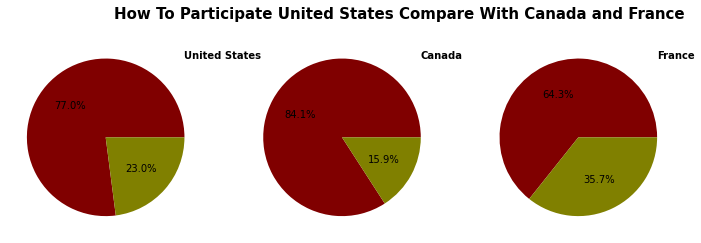

In [17]:
ax,legend=(['l1','l2'])
fig,ax =plt.subplots(1,3,figsize=(12,4))
ax[0].pie(us['type'],colors=color,autopct='%1.1f%%')
ax[0].text(1,1,'United States',weight = 'semibold')
ax[1].pie(ca['type'],colors=color,autopct='%1.1f%%')
ax[1].text(1,1,'Canada',weight='semibold')
ax[2].pie(fa['type'],colors=color,autopct='%1.1f%%')
ax[2].text(1,1,'France',weight='semibold')
ax[0].text(0.1,1.5,'How To Participate United States Compare With Canada and France',weight='bold',fontname='Arial Black',fontsize=15)

# 

# Duration Time United States Compare with Other Countrys

In [18]:
data[['mint','str']]=data['duration'].str.split(' ',expand=True)

In [19]:
data['mint']=data['mint'].astype(int)

In [20]:
timeduration = data.groupby(['country'])['mint'].sum().reset_index()

In [21]:
timeduration=timeduration.sort_values('mint')

Text(0.5, 1.0, 'Duration Time United States Compare With Other Countrys')

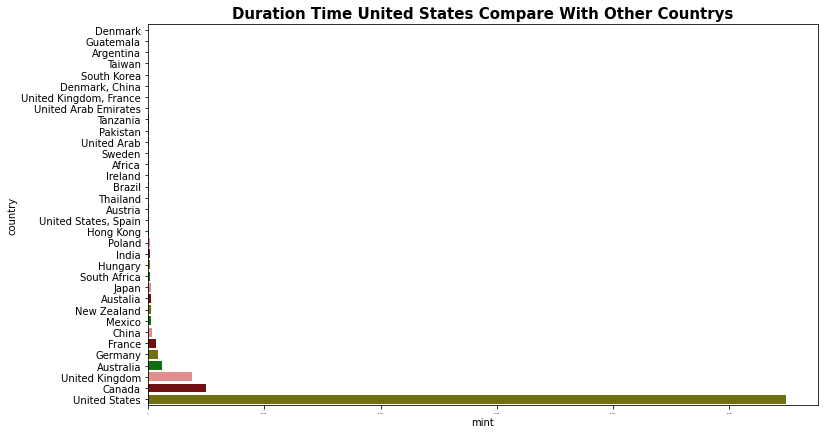

In [22]:
fig = plt.figure(figsize=(12,7))
sns.barplot(x=timeduration['mint'],y=timeduration['country'],palette=color)
plt.tick_params(axis ='x',labelsize=2)
plt.title('Duration Time United States Compare With Other Countrys',fontname='Arial Black',weight='bold',fontsize=15)

# # **Most of Participate United States Disney+
# # Moive,Tv Show all rank is high performance of United States
# # # Time duration Also very high rank.**